# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28103,52,Self-emp-not-inc,183146,12th,8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
14967,19,Private,159313,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
177,34,Private,483777,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,<=50K
6591,33,?,234542,Assoc-voc,11,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
4725,23,Private,126550,HS-grad,9,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,United-States,<=50K
11748,45,Private,108993,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
23514,33,Private,268127,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
8406,65,Local-gov,125768,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,<=50K
25575,47,Self-emp-not-inc,185673,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
7976,34,Private,134737,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,55,United-States,>50K


In [5]:
#loaddate data 

data = pd.read_csv("preprocessed_data.csv") 
X = data.drop("hours-per-week", axis=1) 
y = data["hours-per-week"]

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [7]:
#functieevaluare

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }


In [8]:
#models

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
#SGD

sgd = SGDRegressor(max_iter=2000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_res = evaluate(y_test, sgd_pred)

In [10]:
#linear

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_res = evaluate(y_test, lr_pred)


In [11]:
#decisiontree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_res = evaluate(y_test, dt_pred)


In [12]:
#randomforest

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_res = evaluate(y_test, rf_pred)

In [13]:
results = pd.DataFrame([
    ["SGD", *sgd_res.values()],
    ["Linear Regression", *lr_res.values()],
    ["Decision Tree", *dt_res.values()],
    ["Random Forest", *rf_res.values()]
], columns=["Model", "MAE", "MSE", "RMSE", "R2"])

results


,Model,MAE,MSE,RMSE,R2
0,SGD,3.043974,15.482526,3.934784,0.596032
1,Linear Regression,3.041210,15.535886,3.941559,0.594640
2,Decision Tree,0.066687,0.125743,0.354602,0.996719
3,Random Forest,0.045374,0.022953,0.151504,0.999401


In [14]:
top_features = X.corrwith(y).abs().sort_values(ascending=False).head(30).index

X_train_fs = X_train[top_features]
X_test_fs = X_test[top_features]

rf_fs = RandomForestRegressor(n_estimators=150, random_state=42)
rf_fs.fit(X_train_fs, y_train)

rf_fs_pred = rf_fs.predict(X_test_fs)
rf_fs_res = evaluate(y_test, rf_fs_pred)


c:\Users\Ionela\Desktop\Machine Learning\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ionela\Desktop\Machine Learning\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [15]:
results.loc[len(results)] = ["RF + Feature Selection", *rf_fs_res.values()]
results


,Model,MAE,MSE,RMSE,R2
0,SGD,3.043974,15.482526,3.934784,0.596032
1,Linear Regression,3.041210,15.535886,3.941559,0.594640
2,Decision Tree,0.066687,0.125743,0.354602,0.996719
3,Random Forest,0.045374,0.022953,0.151504,0.999401
4,RF + Feature Selection,0.027432,0.014736,0.121390,0.999616


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

best_pred = best_rf.predict(X_test)
best_res = evaluate(y_test, best_pred)

results.loc[len(results)] = ["RF Tuned", *best_res.values()]
results


## Model Evaluation

Modelele au fost evaluate folosind metricile MAE, MSE, RMSE si R2 Score. Acestea masoara diferite aspecte ale erorii de predictie, unde MAE arata eroarea medie absoluta, MSE si RMSE penalizeaza mai mult erorile mari, iar R2 indica cat de bine explica modelul variatia orelor lucrate.

Comparatia modelelor a fost realizata in principal folosind RMSE, deoarece aceasta metrica este sensibila la erori mari si este potrivita pentru acest dataset care contine valori extreme.

Din tabel se observa ca modelele liniare (SGD si Linear Regression) au cele mai mari valori RMSE, ceea ce indica performanta slaba si faptul ca relatiile din date nu sunt strict liniare.

Decision Tree imbunatateste semnificativ rezultatele, avand o eroare mult mai mica decat modelele liniare, deoarece poate invata relatii neliniare dintre variabile.

Random Forest obtine cele mai bune rezultate generale, cu cele mai mici valori RMSE si cele mai mari scoruri R2, demonstrand o capacitate superioara de generalizare.

Aplicarea feature selection a imbunatatit si mai mult performanta Random Forest, reducand eroarea, in timp ce hyperparameter tuning a mentinut performanta ridicata, dar fara imbunatatiri majore fata de varianta optimizata prin feature selection.

Astfel, modelul Random Forest cu feature selection a fost ales ca model final datorita celei mai mici erori de predictie si celei mai bune explicari a variatiei targetului.

In [16]:
results.sort_values("RMSE")


,Model,MAE,MSE,RMSE,R2
4,RF + Feature Selection,0.027432,0.014736,0.121390,0.999616
3,Random Forest,0.045374,0.022953,0.151504,0.999401
5,RF Tuned,0.045523,0.023344,0.152788,0.999391
2,Decision Tree,0.066687,0.125743,0.354602,0.996719
0,SGD,3.043974,15.482526,3.934784,0.596032
1,Linear Regression,3.041210,15.535886,3.941559,0.594640


In [17]:
best_model = results.loc[results["RMSE"].idxmin()]
best_model


Model    RF + Feature Selection
MAE                    0.027432
MSE                    0.014736
RMSE                    0.12139
R2                     0.999616
Name: 4, dtype: object

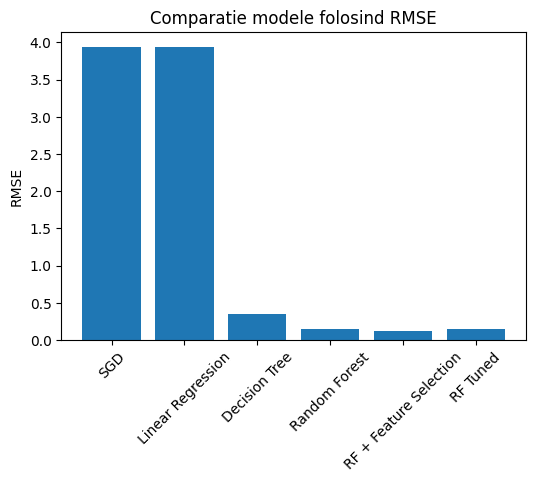

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["RMSE"])
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.title("Comparatie modele folosind RMSE")
plt.show()


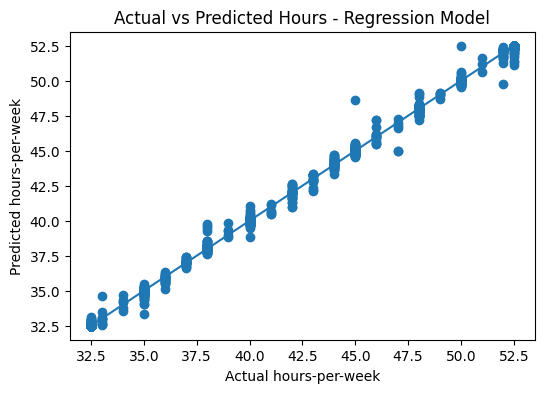

In [19]:
import matplotlib.pyplot as plt

y_pred = best_pred  

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual hours-per-week")
plt.ylabel("Predicted hours-per-week")
plt.title("Actual vs Predicted Hours - Regression Model")
plt.show()


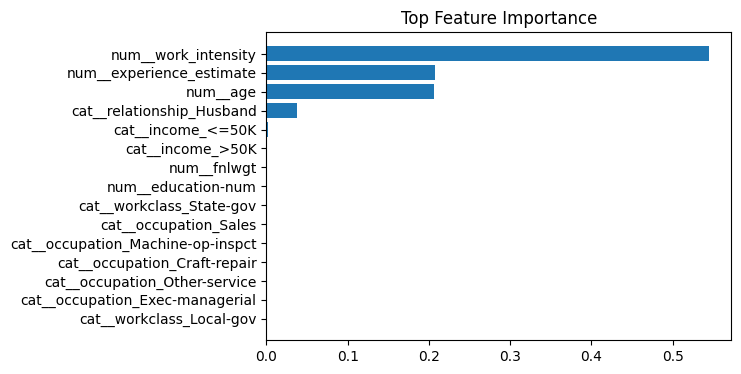

In [20]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(6,4))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top Feature Importance")
plt.show()


## Rezultate

Au fost realizate mai multe experimente folosind diferite modele de regresie, fiecare fiind considerat un experiment separat. Au fost alese modele precum Linear Regression si SGD pentru a avea un punct de comparatie, iar modele mai complexe precum Decision Tree si Random Forest pentru a putea capta relatii neliniare din date. Modelele liniare au avut performante mai slabe, ceea ce arata ca relatia dintre variabile si orele lucrate nu este strict liniara. Decision Tree a imbunatatit rezultatele, iar Random Forest a obtinut cele mai bune performante generale. Random Forest a fost ales ca model final deoarece a avut cele mai mici erori de predictie si cel mai mare scor R2. 

Comparatia modelelor a fost realizata folosind RMSE, deoarece aceasta metrica penalizeaza mai mult erorile mari si este potrivita pentru datele care contin valori extreme. 

Pentru imbunatatiri viitoare, se pot testa modele mai avansate, se pot crea feature-uri noi si se pot trata mai bine outlierii.